
# week1 授業課題3 栗まんじゅう問題
## 【問題】栗まんじゅうが太陽系を覆う日
- 1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。

- 栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。

- ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

## 指数と対数
$$
2x1→2x2→...2^n\\
2^{12} = 4096\\
2を12乗すると4096になる\\
log_2 4096 = 12\\
2を何乗すると4096になるか？　2を底とする4096の対数\\
4096は真数と呼ぶ
$$
## 条件
底の条件：a > 0, a≠ 1
真数の条件： x > 0

### 公式
$$
① log_a MN = log_a M + log_a N\\
log_2 (8 \times 4) = log_2 32 = 5 = 3 + 2 = log_2 8 + log_2 4\\
② log_a \frac{M}{N} = log_a M - log_a N\\
log_2 \frac{8}{4} = log_2 2 = 1 = 3 - 2 = log_2 8 - log_2 4\\
③ log_a M^k = k log_a M\\
log_2 8^3 = log_2 512 = 9 = 3 \times 3 = 3 log_2 8\\
$$


- 栗まんじゅうの体積ax2のn乗=太陽系の体積b
- ax2を底とする(b - a)の対数
$$
    a\times log_2 (b - a)
$$

In [36]:
import math
import matplotlib.pyplot as plt

#print(math.log2(4096))
#print(2**12)

## 栗まんじゅうが太陽系を覆う日　対数を使って解いてみる

In [122]:
def baibain(a, s):
    # aはバイバインを振りかける物体　sは満たす器の容量
    # 1回目の物体aの体積をsから引いておく
    # a * 2^n = sなのでs / aをする
    x = (s - a)/a
    n = math.log2(x)
    ans = math.ceil(n)
    plotls = []
    for i in range(1, ans + 1):
        plotls.append(a*2**i)
        #print(a*2**i)
    return ans,plotls

In [141]:
def plot_baibain(plotls,s):
    # pltls = プロット用のリスト型、s = 満たす器の容量
    %matplotlib inline
    plt.plot(plotls)
    plt.hlines(y=s, xmin=0, xmax=len(plotls), color="y", linestyle="dashed")
    plt.show

太陽系が栗まんじゅうで満たされるのは710分後です


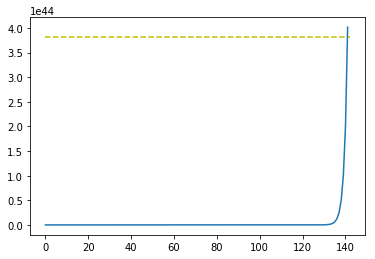

In [142]:
# 栗まんじゅうは「すや」の栗まんじゅう6cm x 4cm x 3cm
kuri = 6*4*3
# 太陽系の広さを半径45億km（45 x 10^8）の球と仮定する　mに変換すると（45 x 10^11） cmに変換すると（45 x 10^13）　
# 半径45億kmはJAXAの太陽系の構成、太陽から海王星までの距離を参照
solar_r = 45*10**13
solar = 4/3*math.pi*solar_r**3
n,plotls = baibain(kuri, solar)
print("太陽系が栗まんじゅうで満たされるのは{}分後です".format(n * 5))
#print(plotls[-1])
#print(solar)
#print(n)
plot_baibain(plotls,solar)

東京ドームが硬式ボールで満たされるのは150分後です


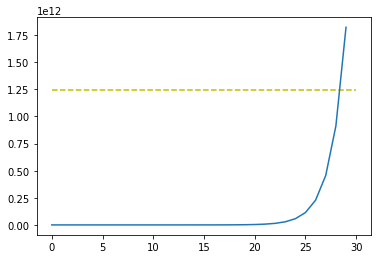

In [143]:
# 東京ドームの体積は124万立法メートル
# 野球の硬式ボールの半径は約7.4cm
ball = 4/3*math.pi*7.4**3
dome = 124*10**10
n,plotls = baibain(ball, dome)
print("東京ドームが硬式ボールで満たされるのは{}分後です".format(n * 5))
#print("ball", ball)
#print("dome", dome)
#print(n)
plot_baibain(plotls,dome)

# 栗まんじゅう whileを使って解いてみる

In [144]:
def baibain_while(a,s):
    # aはバイバインを振りかける物体　sは満たす器の容量
    total = a
    count = 1
    t_list = []
    t_list.append(a)
    while total <= s:
        total += a*2**count
        t_list.append(total)
        count += 1
    return t_list

太陽系が栗まんじゅうで満たされるのは710分後です


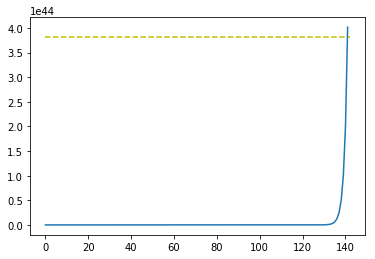

In [145]:
# 栗まんじゅうは「すや」の栗まんじゅう6cm x 4cm x 3cm
kuri = 6*4*3
# 太陽系の広さを半径45億km（45 x 10^8）の球と仮定する　mに変換すると（45 x 10^11） cmに変換すると（45 x 10^13）　
# 半径45億kmはJAXAの太陽系の構成、太陽から海王星までの距離を参照
solar_r = 45*10**13
solar = 4/3*math.pi*solar_r**3
t_list = baibain_while(kuri, solar)
print("太陽系が栗まんじゅうで満たされるのは{}分後です".format(len(t_list) * 5))
plot_baibain(t_list,solar)

東京ドームが硬式ボールで満たされるのは150分後です


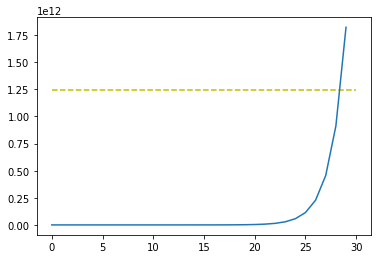

In [146]:
# 東京ドームの体積は124万立法メートル
# 野球の硬式ボールの半径は約7.4cm
ball = 4/3*math.pi*7.4**3
dome = 124*10**10
plotls = baibain_while(ball, dome)
print("東京ドームが硬式ボールで満たされるのは{}分後です".format(n * 5))
plot_baibain(plotls,dome)

結果：logを使用しても、while文で書いても結果は同じであった